In [4]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [69]:
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
input_file1 = filepath + '\\Hercules_dry_Drums_Kick.wav'
input_file2 = filepath + '\\Hercules_dry_Drums_Loop.wav'

# Read the wav file 
samplerate1, data1 = wavfile.read(input_file1)
samplerate2, data2 = wavfile.read(input_file2)
print('Sampling rate = ', samplerate)

Sampling rate =  44100


C:\Users\chorj\AppData\Local\Temp\ipykernel_47260\1242503674.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(input_file1)
C:\Users\chorj\AppData\Local\Temp\ipykernel_47260\1242503674.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(input_file2)


In [70]:
#200000~400000 부분의 샘플만을 가져옵니다
sample1 = data1[250000:850000]
sample2 = data2[250000:850000]
#sample = data[1000000:1500000] : for consecutive data



In [73]:
def plot_waveform(sample):

    plt.figure(figsize=(12, 4))
    plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    plt.title("Stereo Audio Waveform")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

def plot_spectrogram(sample, sample_rate, title="Spectrogram", size=(12, 4)):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.pcolormesh(sample_rate, np.arange(0, sample.shape[0]), sample[:, 0].T)
    plt.show()

def plot_waveform_withBounds(sample, non_silent_segments):
    plt.figure(figsize=(12, 4))
    plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    for start, end in non_silent_segments:
        plt.axvline(x=start, color='green', linestyle='--', label="Segment Start")
        plt.axvline(x=end, color='red', linestyle='--', label="Segment End")
        #print(f"Non-silent segment: Start = {start}, End = {end}")

    plt.title("Stereo Audio with Non-Silent Segments")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    #plt.legend()
    plt.show()



In [ ]:
plot_waveform(sample1)
plot_waveform(sample2)


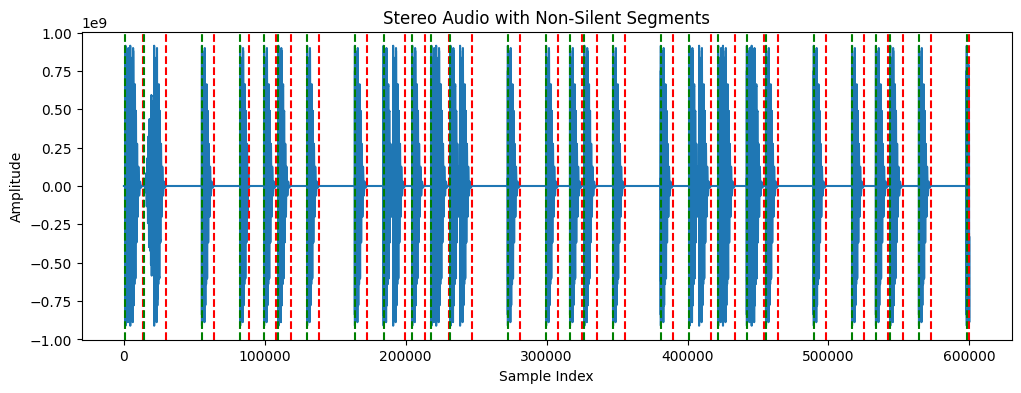

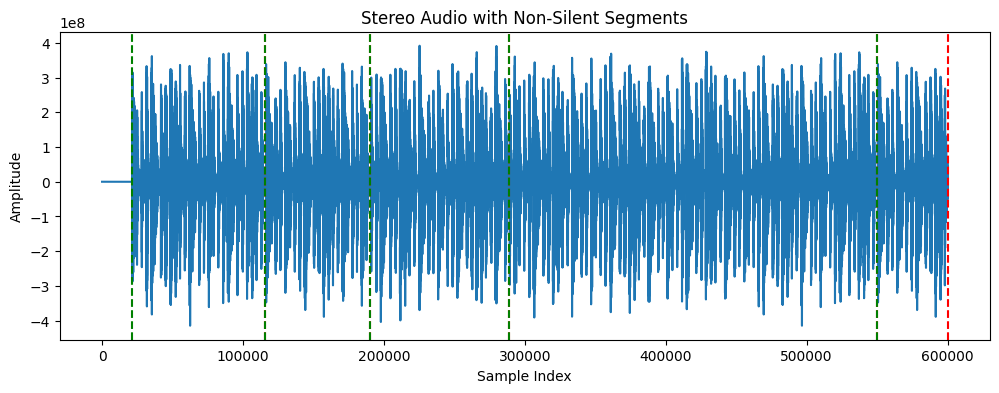

In [75]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt

def find_non_silent_segments(data, samplerate, silence_threshold, min_duration=0.1):
    """Find non-silent segments in the stereo audio data."""
    # Calculate the minimum length for a segment based on minimum duration
    min_segment_length = int(samplerate * min_duration)/4

    # Combine stereo channels by averaging
    combined_data = np.mean(data, axis=1)

    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if abs(sample) > silence_threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None and i - start_index > min_segment_length:
                segments.append((start_index, i))
                start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > min_segment_length:
        segments.append((start_index, len(combined_data)))

    return segments

# Load the audio file
#data, samplerate = sf.read('yourfile.wav')

# Define the silence threshold
silence_threshold = 0.001  # Adjust this based on your audio

# Find non-silent segments
non_silent_segments1 = find_non_silent_segments(sample1, samplerate1, silence_threshold)
non_silent_segments2 = find_non_silent_segments(sample2, samplerate2, silence_threshold)
plot_waveform_withBounds(sample1, non_silent_segments1)
plot_waveform_withBounds(sample2, non_silent_segments2)


In [62]:
print('Number of non-silent segments = ', len(non_silent_segments))
for i in range(len(non_silent_segments)):
    print('Non-silent segment ', i+1, ' = ', non_silent_segments[i])

Number of non-silent segments =  5
Non-silent segment  1  =  (21385, 115556)
Non-silent segment  2  =  (115557, 190016)
Non-silent segment  3  =  (190017, 288779)
Non-silent segment  4  =  (288780, 549771)
Non-silent segment  5  =  (549772, 600000)


In [ ]:
def find_longest_common_pattern(data):
    """Find the longest common pattern in the audio signal."""
    patterns = []
    max_length = 0

    # Iterate over the audio data
    for i in range(len(data)):
        for j in range(i + 1, len(data)):
            pattern = data[i:j]
            if len(pattern) > max_length and pattern in data[j:]:
                patterns.append(pattern)
                max_length = len(pattern)

    return patterns

# Find the longest common pattern in the audio signal
common_patterns = find_longest_common_pattern(sample)

# Print the longest common pattern
if common_patterns:
    longest_pattern = max(common_patterns, key=len)
    print("Longest common pattern:", longest_pattern)
else:
    print("No common pattern found.")
